In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
from textblob import TextBlob
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [2]:
#importing the dataset
#filtered out only required fields due large dataset
pol_comments = pd.read_csv("pol.csv")

In [3]:
#checking the sample from the dataset
pol_comments.head(10)

,_id,time_stamp,com
0,so-whats-going-to-happen,2020-11-05T00:52:31.570Z,To these people when joe is officially preside...
1,did-biden-fuck-up-on-election-night-when-he,2020-11-05T00:52:31.604Z,did Biden fuck up on election night when he ju...
2,activate-them,2020-11-05T00:52:31.607Z,ACTIVATE THEM ALL
3,say-it-with-me,2020-11-08T15:58:53.051Z,"<span class=""quote"">&gt;I will own nothing</sp..."
4,when-will-they-stop,2020-11-05T00:52:31.612Z,I thought the raids would end post-election or...
5,i-love-seeing-trump-lose-its-my-daily-medicine-my,2020-11-05T00:52:31.615Z,"I love seeing TRUMP lose, it&#039;s my daily m..."
6,lets-be-honest-here-trump-was-a-joke-that-went,2020-11-05T00:52:31.618Z,"Let&#039;s be honest here, Trump was a joke th..."
7,is-it-too-late-to-just-redo-the-election-with,2020-11-05T00:52:31.620Z,Is it too late to just re-do the election? Wit...
8,accelerate,2020-11-05T00:52:31.622Z,THIS IS THE CORRECT FUCKING TIMELINE<br>BUCKLE...
9,is-trump-the-last-republican-ever,2020-11-05T00:52:31.624Z,Well /pol/


In [4]:
# seeing the available columns in the dataset
pol_comments.columns

Index(['_id', 'time_stamp', 'com'], dtype='object')

In [5]:
#checking the shape of dataset
pol_comments.shape

(3210, 3)

In [6]:
# assigning the dataset to dataframe
df = pd.DataFrame(pol_comments)

In [7]:
#now checking the shape of dataset in the dataframe
df.shape  # the result will give number of rows, number of columns

(3210, 3)

In [8]:
#converting the comments into text
df['com'] = df['com'].astype(str)

In [9]:
# checking for one row
df['com'][2]

'ACTIVATE THEM ALL'

In [10]:
# to lowercase everything 
#using simple lambda function
df['com'] = df['com'].apply(lambda x:" ".join(x.lower() for x in x.split()))

In [11]:
df['com']

0       to these people when joe is officially preside...
1       did biden fuck up on election night when he ju...
2                                       activate them all
3       <span class="quote">&gt;i will own nothing</sp...
4       i thought the raids would end post-election or...
                              ...                        
3205                                                  nan
3206    please shut up you seething sneeding schizo fa...
3207             /pol/ is still coping three weeks later.
3208    he just talks about how the media hates jews. ...
3209    we not only lost but we looked like deluded fo...
Name: com, Length: 3210, dtype: object

In [12]:
#removing the punctuation
df['com'] = df['com'].str.replace('[^\w\s]','')

In [13]:
# viewing the overall preprocessed data
df['com']

0       to these people when joe is officially preside...
1       did biden fuck up on election night when he ju...
2                                       activate them all
3       span classquotegti will own nothingspanbrspan ...
4       i thought the raids would end postelection or ...
                              ...                        
3205                                                  nan
3206    please shut up you seething sneeding schizo fa...
3207                pol is still coping three weeks later
3208    he just talks about how the media hates jews b...
3209    we not only lost but we looked like deluded fo...
Name: com, Length: 3210, dtype: object

In [14]:
#function for textblob caluclating sentimental score
def senti(x):
    return TextBlob(x).sentiment

In [15]:
df['senti_score'] = df['com'].apply(senti)

In [18]:
mw = df['senti_score']

In [20]:
#viewing the sentimental scores of polarity and subjectivity
mw

0                                        (0.2, 0.2)
1         (0.11249999999999999, 0.5333333333333333)
2                                        (0.0, 0.0)
3                        (0.2572727272727272, 0.62)
4       (-0.07166666666666666, 0.30166666666666664)
                           ...                     
3205                                     (0.0, 0.0)
3206                                     (0.0, 0.0)
3207                                     (0.0, 0.0)
3208                                     (0.0, 0.0)
3209     (-0.16666666666666666, 0.8333333333333333)
Name: senti_score, Length: 3210, dtype: object

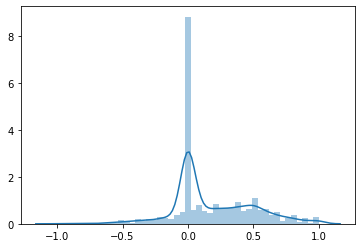

In [26]:
#importing seaborn for plotting
import seaborn as sns
sns.distplot([mw])
#[mw].mean()